# Case Studi: Data Profiling
***Dear Aksara,***

Tolong proses dataset terlampir yang  disimpan dalam bentuk csv bernama 'https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv'.

***Kamu bisa memprosesnya dengan cara berikut:***

1. Import dataset csv ke variable bernama uncleaned_raw
2. Inspeksi dataframe uncleaned_raw
3. Check kolom yang mengandung missing value. Jika ada, kolom apakah itu dan berapa persen missing value pada kolom tersebut?
4. Mengisi missing value tersebut dengan mean dari kolom tersebut!

Setelah membaca email tersebut, aku pun memulai kode programnya di code editor.

In [2]:
# Import library
import pandas as pd
import numpy as np
import io

In [3]:
# Baca dataset uncleaned_raw.csv
uncleaned_raw = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/uncleaned_raw.csv')

In [4]:
#inspeksi dataframe uncleaned_raw
print('Lima data teratas:')
print(uncleaned_raw.head())

Lima data teratas:
   InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  


In [5]:
#Check kolom yang mengandung missing value
print('\nKolom dengan missing value:')
print(uncleaned_raw.isnull().any())


Kolom dengan missing value:
InvoiceNo      False
Description    False
Quantity        True
InvoiceDate    False
UnitPrice      False
CustomerID     False
City           False
dtype: bool


In [6]:
#Persentase missing value pada kolom length_qty
length_qty = len(uncleaned_raw['Quantity'])
print('Length kolom length_qty:', length_qty)

#Persentase missing value pada kolom count_qty
count_qty = uncleaned_raw['Quantity'].count()
print('Length kolom count_qty:', count_qty)

Length kolom length_qty: 505
Length kolom count_qty: 485


In [7]:
#mengurangi length dengan count
number_of_missing_values_qty = length_qty - count_qty
print('number_of_missing_values_qty:', number_of_missing_values_qty)

number_of_missing_values_qty: 20


In [8]:
#mengubah ke bentuk float
float_of_missing_values_qty = float(number_of_missing_values_qty / length_qty)
print('float_of_missing_values_qty:', float_of_missing_values_qty)

float_of_missing_values_qty: 0.039603960396039604


In [9]:
#mengubah ke dalam bentuk persen
pct_of_missing_values_qty = '{0:.1f}%'.format(float_of_missing_values_qty*100)

In [10]:
#print hasil percent dari missing value
print('Persentase missing value kolom Quantity:', pct_of_missing_values_qty)

Persentase missing value kolom Quantity: 4.0%


In [11]:
#Mengisi missing value tersebut dengan mean dari kolom tersebut
uncleaned_raw['Quantity'] = uncleaned_raw['Quantity'].fillna(uncleaned_raw['Quantity'].mean())
print('uncleaned_raw:', uncleaned_raw.head())

uncleaned_raw:    InvoiceNo                          Description  Quantity     InvoiceDate  \
0     536365   WHITE HANGING HEART T-LIGHT HOLDER       6.0  12/01/10 08.26   
1     536366                  WHITE METAL LANTERN       6.0  12/01/10 08.26   
2     536367       CREAM CUPID HEARTS COAT HANGER       8.0  12/01/10 08.26   
3     536368  KNITTED UNION FLAG HOT WATER BOTTLE       6.0  12/01/10 08.26   
4     536369       RED WOOLLY HOTTIE WHITE HEART.       6.0  12/01/10 08.26   

   UnitPrice  CustomerID      City  
0      29000       17850  Surabaya  
1      41000       17850  Surabaya  
2      18000       17850  Surabaya  
3      38000       17850   Jakarta  
4      27000       17850     Medan  


## Data Cleansing

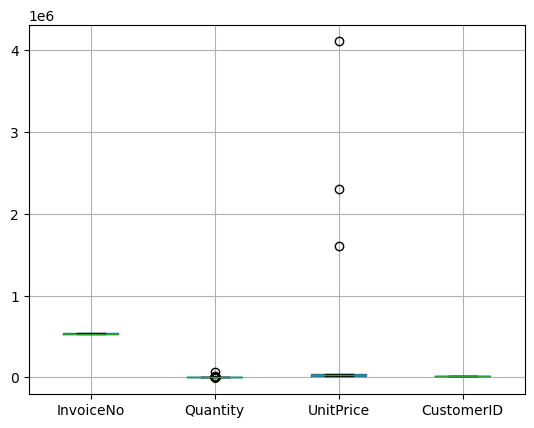

In [12]:
# Import Library
import matplotlib.pyplot as plt

#Mengetahui kolom yang memiliki outliers!
uncleaned_raw.boxplot()
plt.show()

In [13]:
#Check IQR
Q1 = uncleaned_raw['UnitPrice'].quantile(0.25)
Q3 = uncleaned_raw['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

#removing outliers
uncleaned_raw = uncleaned_raw[~((uncleaned_raw[['UnitPrice']] < (Q1 - 1.5 * IQR)) | (uncleaned_raw[['UnitPrice']] > (Q3 + 1.5 * IQR)))]

#check for duplication
print(uncleaned_raw.duplicated(subset=None))

#remove duplication
uncleaned_raw = uncleaned_raw.drop_duplicates()


0      False
1      False
2      False
3      False
4      False
       ...  
500     True
501     True
502     True
503     True
504     True
Length: 505, dtype: bool
